In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [91]:
# Read in 2019 sales dataset

master_19 = pd.read_csv('Data/Master_Sales_2019.csv')

# Read in 2020 sales dataset

master_20 = pd.read_csv('Data/master_sales_2020.csv')

# Read in 2018 sales dataset

master_18 = pd.read_csv('Data/master_sales_2018.csv')




In [92]:
# insert year column into dataframse

master_19.insert(2,'Year',2019)

master_20.insert(2,'Year',2020)

master_18.insert(2,'Year',2018)

In [93]:
new_master_df = pd.concat([master_18,master_19,master_20],join='inner')

new_master_df['Discount'] = new_master_df['Discount'] *(-1)



In [94]:
# classes = new_master_df['Customer Class']

# samples = new_master_df['Customer Class'] == 'Samples'

# donations = new_master_df['Customer Class'] == 'Donations'

# list_class = []

# for x in classes:
#     x != samples
#     list_class.append(x)
#     x != donations
#     list_class.append(x)
#     print(x)


In [95]:
new_master_df['Revenue'].dropna(axis=0,inplace=True)

new_master_df['Discount'] = new_master_df['Discount'] *(-1)

# new_master_df.drop(labels=['Donations','Samples'],axis=1,inplace=True)

# new_master_df.loc[['Donatiions','Samples'],['Customer Class']]

# new_master_df['Revenue'] = new_master_df['Revenue'] *(-1)

In [96]:
# new_master_df = new_master_df.fillna(value=0)

<AxesSubplot:>

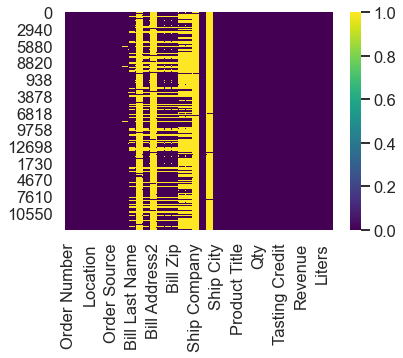

In [97]:
sns.heatmap(new_master_df.isnull(),cmap='viridis')

In [98]:
# Impute Average Revenue for null values

avg_rev = 68

#create function to impute average price into 'price' column
# @staticmethod
def impute_price(cols):
    revenue = cols
   
        
    if pd.isna(revenue):
        return avg_rev
    else:
        return revenue

In [99]:
new_master_df['Revenue'] = new_master_df['Revenue'].apply(impute_price)

In [100]:
new_master_df['Revenue'] = new_master_df['Revenue'].round(0).astype(int)

In [101]:
new_master_df.columns

Index(['Order Number', 'Sale Date', 'Year', 'Location', 'Customer Class',
       'Sales Rep', 'Order Source', 'Customer No.', 'Bill First Name',
       'Bill Last Name', 'Bill Company', 'Bill Address1', 'Bill Address2',
       'Bill City', 'Bill State', 'Bill Zip', 'Ship First Name',
       'Ship Last Name', 'Ship Company', 'Ship Address1', 'Ship Address2',
       'Ship City', 'Ship State', 'Ship Zip', 'Product Title', 'Part No',
       'OPSKU', 'Qty', 'Unit Price', 'Discount', 'Tasting Credit', 'Ship Cost',
       'Sales Tax', 'Revenue', 'Gift Card Deposit', 'Gallons', 'Liters',
       'Unit Cost'],
      dtype='object')

Text(0.5, 1.0, 'Transactions by Order Source')

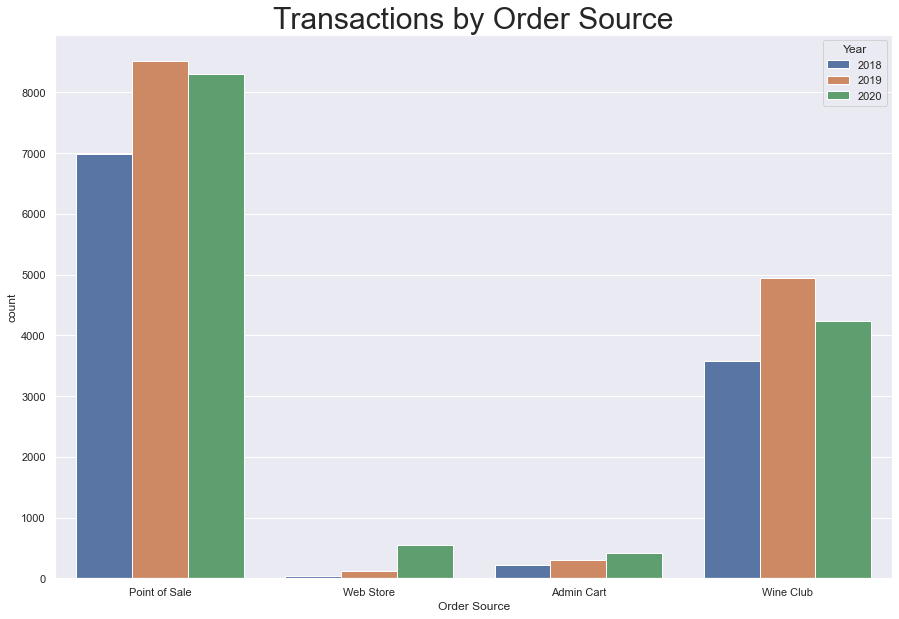

In [102]:
# Display plot showing the count of transactions by order source

sns.set(rc={'figure.figsize':(15,10)})

ax = sns.countplot(x='Order Source', data=new_master_df, hue='Year')

ax.set_title('Transactions by Order Source',
             fontsize=30)

In [68]:
# Save Figure
ax.figure.savefig('Order Source Transactions18-20')

In [103]:
grouped_sales_years = new_master_df.groupby(['Customer Class','Year']).sum().reset_index()
                                                                                        

In [104]:
grouped_sales_years

,Customer Class,Year,Order Number,Customer No.,Ship Zip,Part No,Qty,Unit Price,Discount,Tasting Credit,Ship Cost,Sales Tax,Revenue,Gift Card Deposit,Gallons,Liters,Unit Cost
0,Ambassadors,2018,11885496,3782341,130057645,133518,3173,61520.00,-31299.40,0,294.00,0.00,94999,0,567.98,2142.80,14310
1,Ambassadors,2019,27910415,7772807,188971809,289088,4360,89449.00,-42244.95,0,107.50,80.06,128860,0,817.74,3085.52,19195
2,Ambassadors,2020,49637942,14291897,236738652,573335,5524,131023.42,-62279.65,0,684.78,147.14,181839,0,1158.23,4369.52,26250
3,Consumer,2018,32908218,22386356,376258724,309438,6249,94664.60,-11458.81,-4365,2828.00,0.00,132959,325,748.33,2814.46,21230
4,Consumer,2019,64349162,39810723,436899961,509799,6638,122813.00,-9131.98,-10360,1993.60,144.47,151664,170,774.33,2911.58,22840
5,Consumer,2020,56582891,32359619,270424209,491424,4555,91810.46,-7236.44,-6520,2649.40,201.33,128066,565,684.65,2578.53,16275
6,Distributor,2018,62634,41274,582738,597,6,128.50,-128.50,0,0.00,0.00,0,0,1.20,4.50,75
7,Employee,2018,339072,113253,3787797,3700,50,1460.00,-886.00,0,0.00,0.00,982,0,9.49,35.63,420
8,Employee,2019,616643,152361,4176289,6227,72,1649.00,-1305.50,0,0.00,0.00,1299,0,13.83,52.13,465
9,Employee,2020,1346986,414091,6344885,14894,99,2534.00,-1713.50,0,100.00,32.61,1879,0,19.13,72.00,650


Text(0.5, 1.0, 'Revenue by Customer Class')

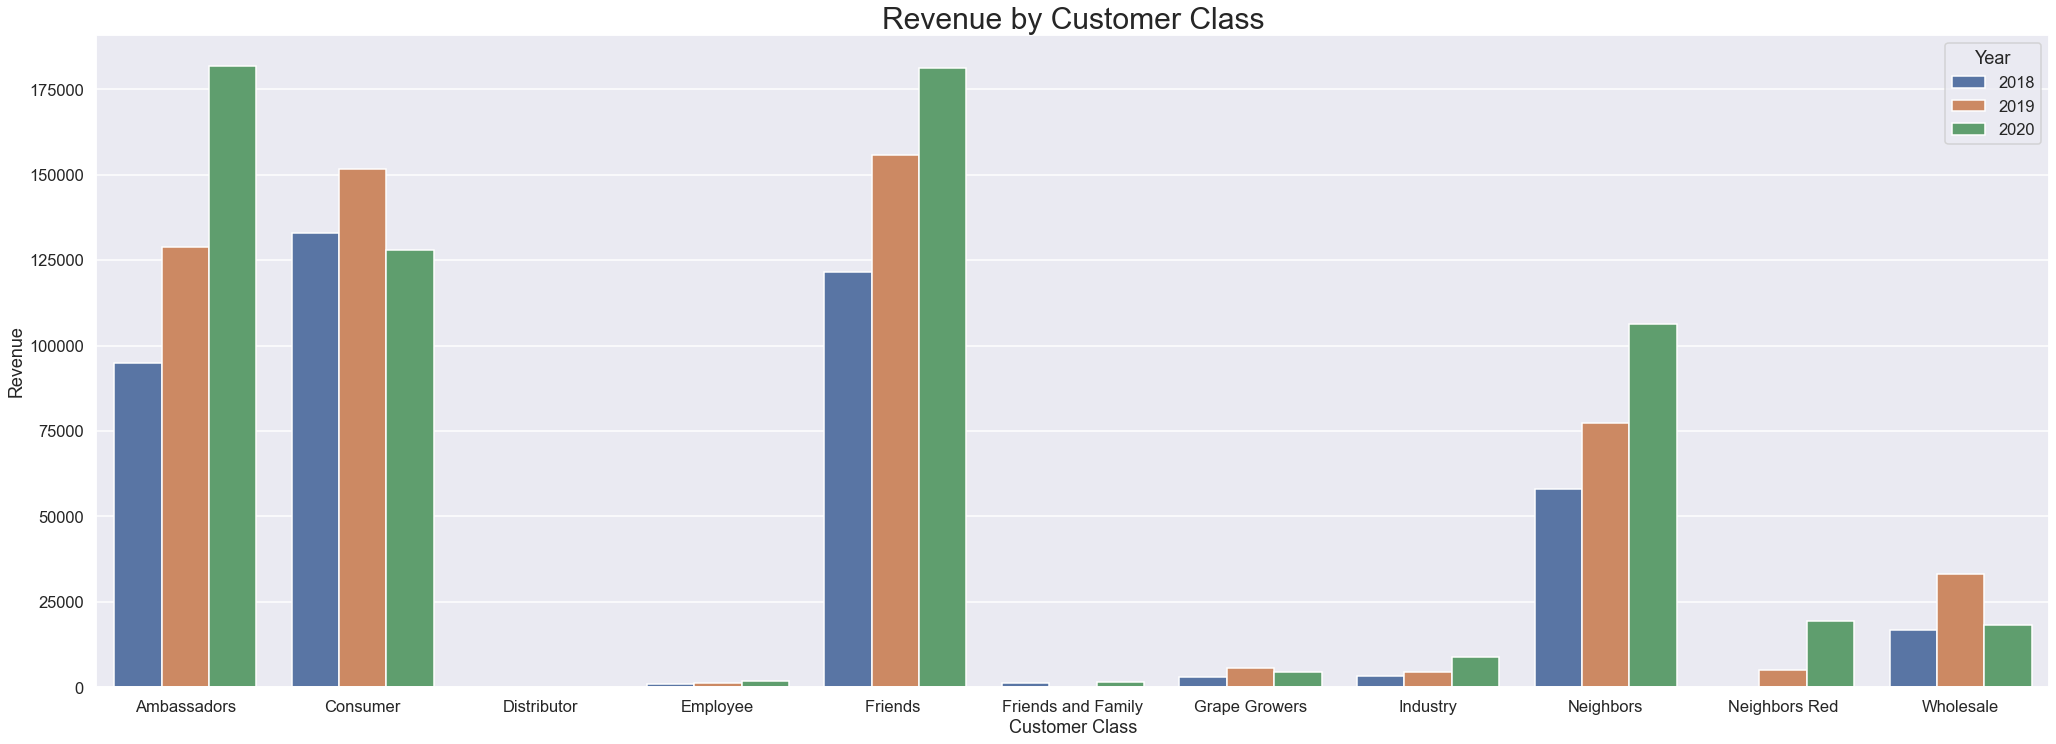

In [105]:
sns.set(rc={'figure.figsize':(35,12)})

sns.set_context('talk')

class_rev_plot = sns.barplot(x='Customer Class', y='Revenue',data=grouped_sales_years, hue='Year')

class_rev_plot.set_title('Revenue by Customer Class',
             fontsize=30)

In [72]:
# Save Figure

class_rev_plot.figure.savefig('Total Revenue by Customer Class 18-20')

In [73]:
new_master_df['Customer Class'].filter(items=['Amabassadors'],axis=0)

Series([], Name: Customer Class, dtype: object)

In [109]:
# Convert columns to boolean values

# Ambassadors
new_master_df['Ambassadors'] = new_master_df['Customer Class'] =='Ambassadors'

new_master_df['Ambassadors'] = new_master_df['Ambassadors'].astype(int)

# Friends
new_master_df['Friends'] = new_master_df['Customer Class'] =='Friends '

new_master_df['Friends'] = new_master_df['Friends'].astype(int)

# Neighbors
new_master_df['Neighbors'] = new_master_df['Customer Class'] =='Neighbors'

new_master_df['Neighbors'] = new_master_df['Neighbors'].astype(int)

# Neighbors Red
new_master_df['Neighbors Red'] = new_master_df['Customer Class'] =='Neighbors Red'

new_master_df['Neighbors Red'] = new_master_df['Neighbors Red'].astype(int)

<AxesSubplot:xlabel='Friends', ylabel='count'>

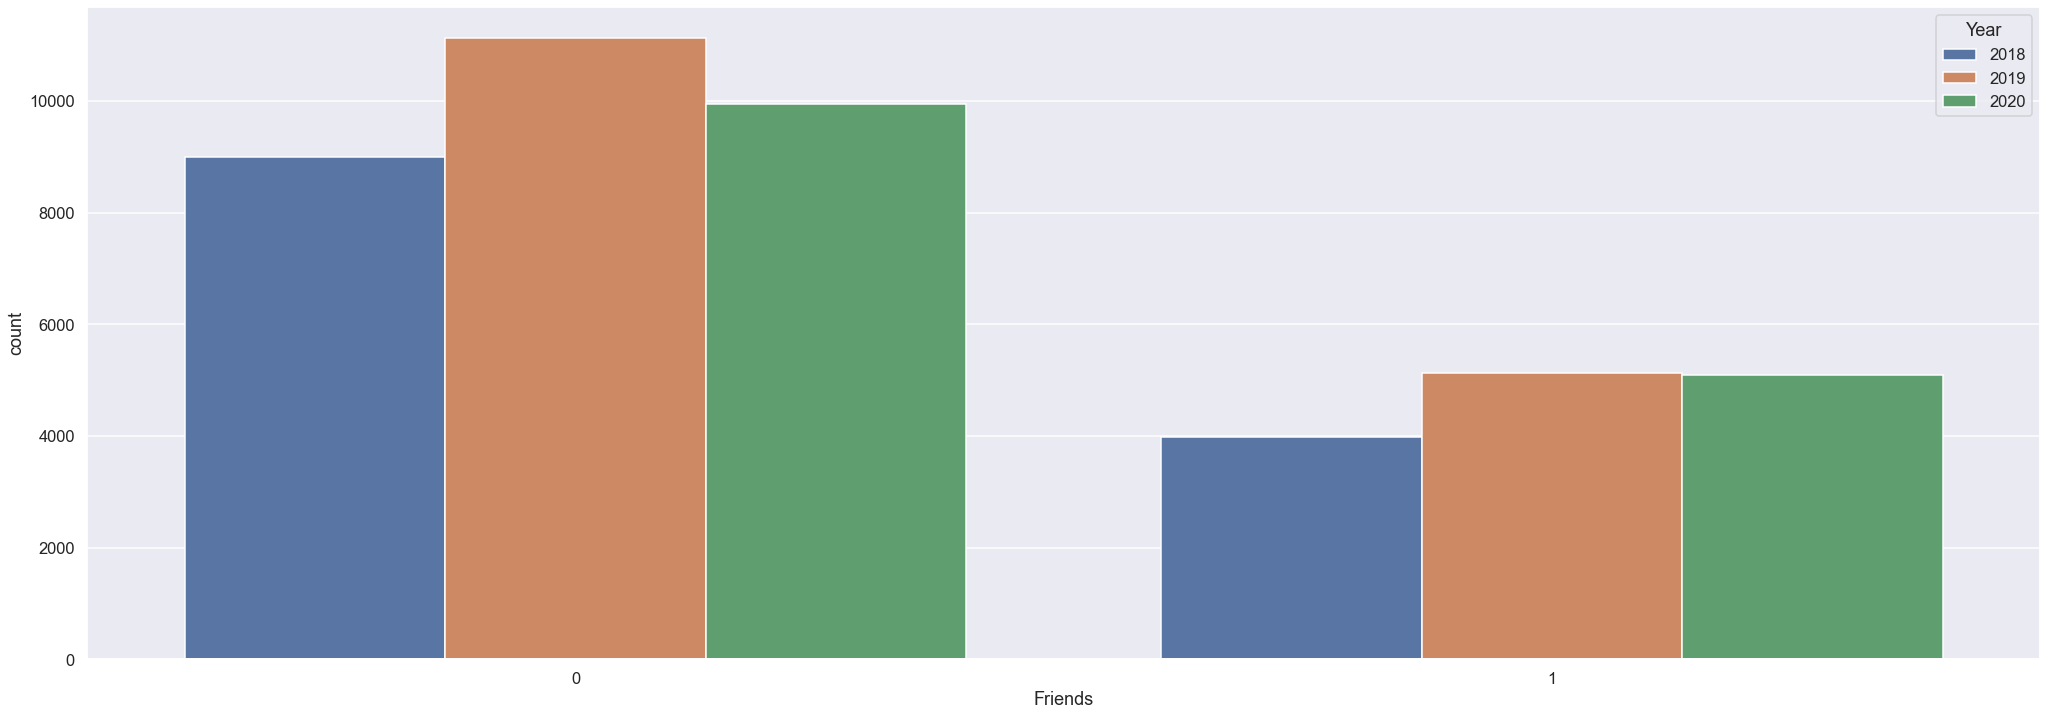

In [75]:
sns.countplot(x='Friends',hue='Year',data=new_master_df)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [123]:
#Prepare data for model insertion

X = np.array(new_master_df['Qty'])

X= X.reshape(-1,1)
y = new_master_df['Revenue']

In [78]:
#Import library to evaluate the model

from sklearn.metrics import classification_report

In [79]:
# print(classification_report(y_test,predictions))

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [125]:
model.fit(X, y)

LinearRegression()

In [126]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [19.18667459]
y-axis intercept:  10.40665769350889


In [127]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: 0    2700
0    1152
0    3024
Name: Revenue, dtype: int32
Predicted output: 1161.6071332111262
Prediction Error: 0   -1538.392867
0       9.607133
0   -1862.392867
Name: Revenue, dtype: float64


In [131]:
regression_df = pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

In [117]:
x_min = X.min()
x_max = X.max()

In [118]:
y_min_actual = y.min()
y_max_actual = y.max()

In [119]:
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: -45
Predicted Min Value: [-8.7800169]
Actual Max Value: 3024
Predicted Max Value: [3233.76798914]


In [88]:
new_master_df.columns

Index(['Order Number', 'Sale Date', 'Year', 'Location', 'Customer Class',
       'Sales Rep', 'Order Source', 'Customer No.', 'Bill First Name',
       'Bill Last Name', 'Bill Company', 'Bill Address1', 'Bill Address2',
       'Bill City', 'Bill State', 'Bill Zip', 'Ship First Name',
       'Ship Last Name', 'Ship Company', 'Ship Address1', 'Ship Address2',
       'Ship City', 'Ship State', 'Ship Zip', 'Product Title', 'Part No',
       'OPSKU', 'Qty', 'Unit Price', 'Discount', 'Tasting Credit', 'Ship Cost',
       'Sales Tax', 'Revenue', 'Gift Card Deposit', 'Gallons', 'Liters',
       'Unit Cost', 'Ambassadors', 'Friends', 'Neighbors', 'Neighbors Red'],
      dtype='object')

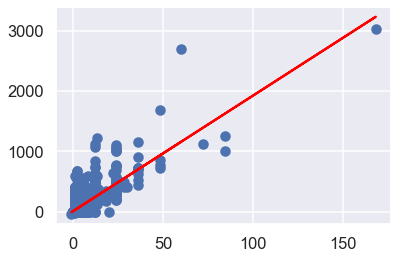

In [135]:
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.show()

In [141]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [136]:
from sklearn.ensemble import RandomForestRegressor 

In [137]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [142]:
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [143]:
predictions_trees = regressor.predict(X_test)

In [144]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_test,predictions_trees))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

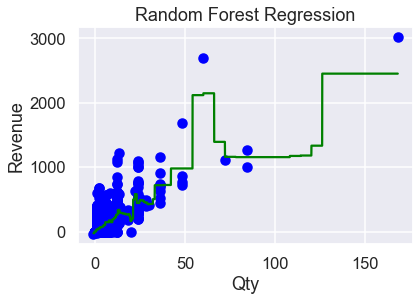

In [140]:
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(X), max(X), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
plt.scatter(X, y, color = 'blue')   
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Qty') 
plt.ylabel('Revenue') 
plt.show()

In [ ]:
from sklearn import metrics
# testing score
score = metrics.f1_score(y_test, pred, pos_label=list(set(y_test)))
# training score
score_train = metrics.f1_score(y_train, pred_train, pos_label=list(set(y_train)))